In [1]:
# !pip install tensorflow
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
import rasterio

# Path to your GeoTIFF file
file_path = "/global/scratch/users/arvalcarcel/CSMUB/RESULTS/MONTHLY_TIF/3265601/3265601_watermask_2018-08.tif"

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    width = src.width  # Number of pixels in width
    height = src.height  # Number of pixels in height

print(f"Pixel Dimensions: Width={width}, Height={height}")


Pixel Dimensions: Width=2342, Height=1941


In [6]:
opened = []

csv_path = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/CSV/'

masterlist = '/global/scratch/users/arvalcarcel/CSMUB/RESULTS/ALL_STATIONS_FINAL_REVISED.csv'

stations_df = pd.read_csv(masterlist)
station_num = stations_df['grdc_no']

directory = "/global/scratch/users/arvalcarcel/CSMUB/RESULTS/MONTHLY_TIF/"
file_list = []

for root, dirs, files in os.walk(directory):
    for file in files:
        file_list.append(os.path.join(root, file))

file_list.sort()


arrayFile = [os.path.join(csv_path, f"{station_no}.csv") for station_no in station_num]

for file in arrayFile:
  df = pd.read_csv(file, index_col= None, header = 0)
  opened.append(df)

total_df = pd.concat(opened, axis = 0, ignore_index = True)

In [1]:
import rasterio
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Function to load and preprocess GeoTIFF
def load_geotiff(file_path):
    with rasterio.open(file_path) as src:
        data = src.read()  # Read all bands as a NumPy array
        width = 3549  # Number of pixels in width
        height = 3549  # Number of pixels in height
    data = np.moveaxis(data, 0, -1)  # Move channels to the last dimension
    return data

# Example file paths and labels
file_paths = file_list
labels = total_df['Q']

# Load and preprocess all GeoTIFFs
X = np.array([load_geotiff(fp) for fp in file_paths])
y = np.array(labels)

NameError: name 'file_list' is not defined

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a Conv2D model
CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Output for regression
])

# Compile the model
CNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
CNNhistory = CNN.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, mae = CNN.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

Epoch 1/10


/global/home/users/arvalcarcel/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0238 - loss: 50550140.0000 - val_accuracy: 0.0000e+00 - val_loss: 57186972.0000
Epoch 2/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.4456e-04 - loss: 49791016.0000 - val_accuracy: 0.0000e+00 - val_loss: 56676432.0000
Epoch 3/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.6401e-04 - loss: 73423648.0000 - val_accuracy: 0.0000e+00 - val_loss: 56226216.0000
Epoch 4/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 2.1663e-04 - loss: 57379308.0000 - val_accuracy: 0.0000e+00 - val_loss: 55961024.0000
Epoch 5/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 2.3434e-04 - loss: 37470784.0000 - val_accuracy: 0.0000e+00 - val_loss: 55821832.0000
Epoch 6/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.6969e-04 - loss: 57792256.0000 - val_accuracy: 0.0000e+00 - val_loss: 55717036.0000
Epoch 7/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 2.5944e-04 - loss: 60969196.0000 - val_accuracy: 0.

In [ ]:
CNN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 1, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

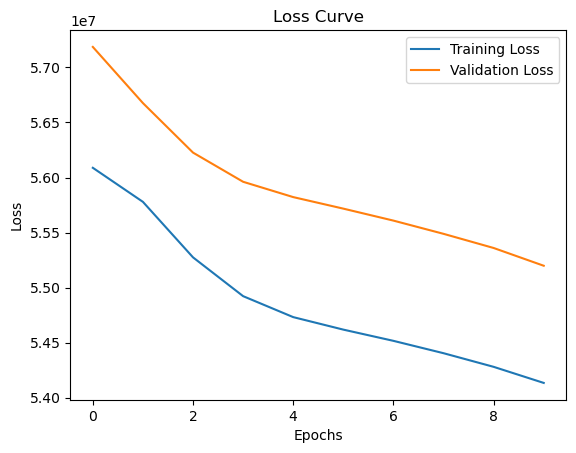

In [17]:
# Plot training and validation loss
plt.plot(CNN.history['loss'], label='Training Loss')
plt.plot(CNN.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
val_loss, val_accuracy = CNN.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.0000e+00 - loss: 77103808.0000
Validation Loss: 55197816.0
Validation Accuracy: 0.0


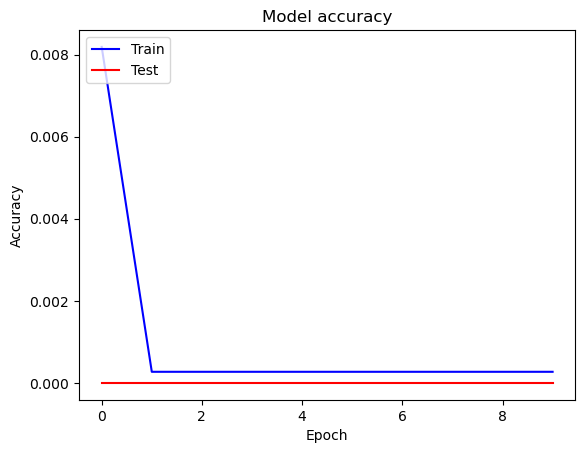

In [19]:
plt.plot(CNN.history['accuracy'],'b')
plt.plot(CNN.history['val_accuracy'],'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plt.plot(CNN.history['mae'],'b')
# plt.plot(CNN.history['val_mae'],'r')
# plt.title('Model Mean Absolute Error')
# plt.ylabel('Mean Absolute Error')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


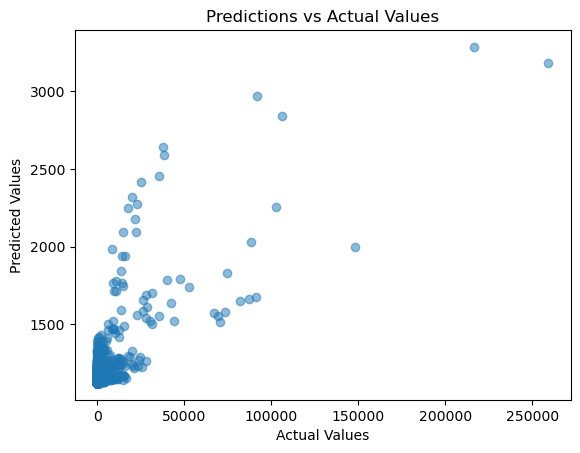

In [ ]:
# Make predictions on the validation set
y_pred = CNN.predict(X_val)

# Compare predictions with actual values
plt.scatter(y_val, y_pred, alpha=0.5)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_val, y_pred, squared=False)
print(rms)

7429.52383687534
